In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('King_County_House_prices_dataset.txt')

In [3]:
# random splitting of rows into 80% and 20 %
cust_test_data = np.random.rand(len(data)) < 0.8

In [4]:
# splitting data into model data (80%) and customer test data (20%)
model_data = data[cust_test_data]
cust_test_data = data[~cust_test_data]

In [5]:
# checking for uniform datatypes
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17273 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17273 non-null  int64  
 1   date           17273 non-null  object 
 2   price          17273 non-null  float64
 3   bedrooms       17273 non-null  int64  
 4   bathrooms      17273 non-null  float64
 5   sqft_living    17273 non-null  int64  
 6   sqft_lot       17273 non-null  int64  
 7   floors         17273 non-null  float64
 8   waterfront     15364 non-null  float64
 9   view           17224 non-null  float64
 10  condition      17273 non-null  int64  
 11  grade          17273 non-null  int64  
 12  sqft_above     17273 non-null  int64  
 13  sqft_basement  17273 non-null  object 
 14  yr_built       17273 non-null  int64  
 15  yr_renovated   14236 non-null  float64
 16  zipcode        17273 non-null  int64  
 17  lat            17273 non-null  float64
 18  long  

In [7]:
# coverting data string to date formate and sqft_basement into int type
model_data.date = pd.to_datetime(model_data.date)
model_data.sqft_basement = pd.to_numeric(model_data.sqft_basement, errors='coerce')

In [8]:
# replace nan with zero
model_data.view = model_data.view.fillna(0)
model_data.waterfront = model_data.waterfront.fillna(0)
model_data.yr_renovated = model_data.yr_renovated.fillna(0)
model_data.sqft_basement = model_data.sqft_basement.fillna(0)

In [9]:
model_data.view = model_data.view.astype(int)
model_data.waterfront = model_data.waterfront.astype(int)
model_data.yr_renovated = model_data.yr_renovated.astype(int)
model_data.id = model_data.id.astype(str)
model_data.zipcode = model_data.zipcode.astype(str)
model_data.floors = model_data.floors.astype(int)
model_data.sqft_basement = model_data.sqft_basement.astype(int)

In [10]:
model_data[['date','yr_renovated']].head()

,date,yr_renovated
0,2014-10-13,0
2,2015-02-25,0
4,2015-02-18,0
5,2014-05-12,0
6,2014-06-27,0


In [12]:
# replace null values to the year buil,as we have no information
model_data.yr_renovated = np.where(model_data.yr_renovated == 0, model_data.yr_built, model_data.yr_renovated )

In [13]:
# creating new date, month and year sold columns from sold date column
model_data['year_sold']= model_data['date'].dt.year
model_data['month_sold']= model_data['date'].dt.month
model_data['day_sold']= model_data['date'].dt.day

<ipython-input-13-50da72c6c494>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['year_sold']= model_data['date'].dt.year
<ipython-input-13-50da72c6c494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['month_sold']= model_data['date'].dt.month
<ipython-input-13-50da72c6c494>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [14]:
model_data.shape

(17273, 24)

In [15]:
model_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650,2014,10,13
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062,2015,2,25
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503,2015,2,18
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,2001,98053,47.6561,-122.005,4760,101930,2014,5,12
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,1995,98003,47.3097,-122.327,2238,6819,2014,6,27


In [16]:
# rearrange the position of the columns
cols = model_data.columns.to_list()
cols

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year_sold',
 'month_sold',
 'day_sold']

In [17]:
cols = ['id','price','date','year_sold','month_sold','day_sold','bedrooms','bathrooms',
        'sqft_living','sqft_lot','floors','waterfront','view','condition',
        'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode',
        'lat','long','sqft_living15','sqft_lot15']

In [18]:
model_data = model_data[cols]

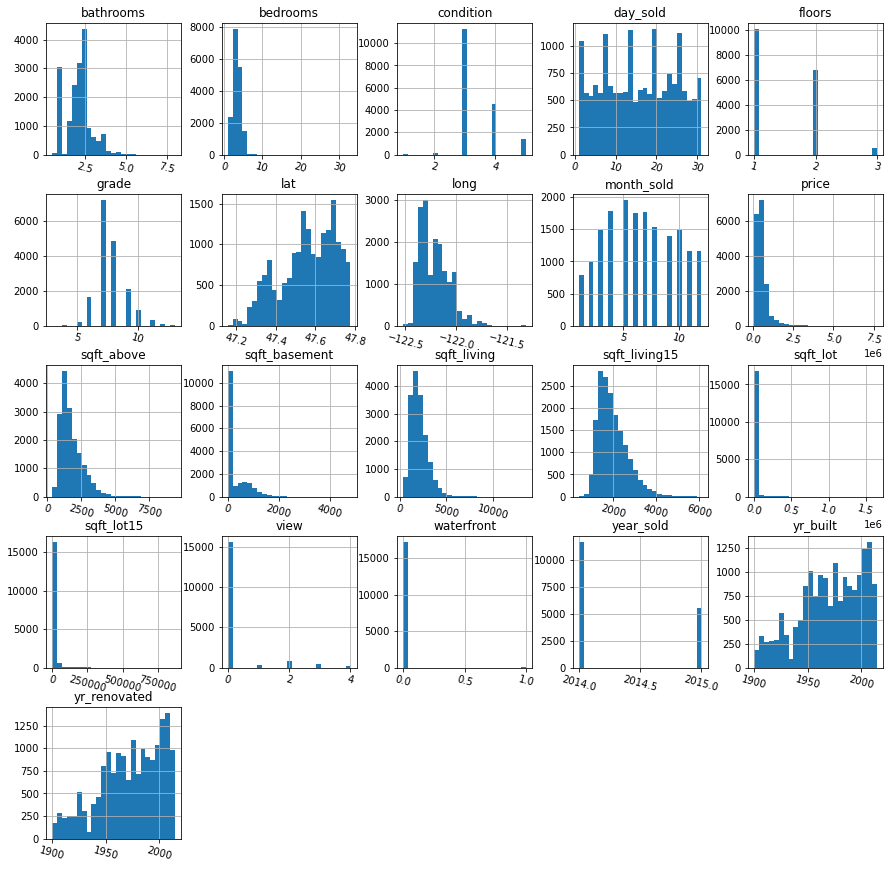

In [19]:
hist_grid = model_data[['id','price','date','year_sold','month_sold','day_sold','bedrooms','bathrooms',
                        'sqft_living','sqft_lot','floors','waterfront','view','condition',
                        'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode',
                        'lat','long','sqft_living15','sqft_lot15'
                       ]].hist(bins=25,figsize=(15,15),xlabelsize='10',ylabelsize='10',xrot=-15);

[x.title.set_size(12) for x in hist_grid.ravel()];

In [20]:
reg_data = model_data.copy()

In [21]:
reg_data.columns

Index(['id', 'price', 'date', 'year_sold', 'month_sold', 'day_sold',
       'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17273 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17273 non-null  object        
 1   price          17273 non-null  float64       
 2   date           17273 non-null  datetime64[ns]
 3   year_sold      17273 non-null  int64         
 4   month_sold     17273 non-null  int64         
 5   day_sold       17273 non-null  int64         
 6   bedrooms       17273 non-null  int64         
 7   bathrooms      17273 non-null  float64       
 8   sqft_living    17273 non-null  int64         
 9   sqft_lot       17273 non-null  int64         
 10  floors         17273 non-null  int32         
 11  waterfront     17273 non-null  int32         
 12  view           17273 non-null  int32         
 13  condition      17273 non-null  int64         
 14  grade          17273 non-null  int64         
 15  sqft_above     1727

In [23]:
reg_data = reg_data[reg_data["bedrooms"] != 33]

In [24]:
# model 1 : no outliers dropped and Col: Id, sqft_above, sqft_lot15, date, zipcode are dropped
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = reg_data[['year_sold','month_sold', 'day_sold',
               'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
               'waterfront', 'view', 'condition', 'grade',
               'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long',
               'sqft_living15']]
Y = reg_data['price']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [26]:
# adding constant
X_train = sm.add_constant(X_train) # adding a constant
X_test = sm.add_constant(X_test) # adding a constant

In [27]:
#training the model
print("-----  Training the model ----")
model = sm.OLS(Y_train, X_train).fit()
model.summary()

-----  Training the model ----


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1469.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:36:05   Log-Likelihood:            -1.5776e+05
No. Observations:               11572   AIC:                         3.156e+05
Df Residuals:                   11553   BIC:                         3.157e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.074e+08   1.32e+07     -8.129      0.000   -1.33e+08   -8.15e+07
year_sold      3.477e+04   6470.752      5.374      0.000    2.21e+04    4.75e+04
month_sold      166.9956    970.945      0.172      0.863   -1736.221    2070.212
day_sold       -188.7814    218.330     -0.865      0.387    -616.745     239.182
bedrooms      -3.915e+04   2658.357    -14.726      0.000   -4.44e+04   -3.39e+04
bathrooms      3.524e+04   4457.872      7.905      0.000    2.65e+04     4.4e+04
sqft_living     183.4105      5.029     36.469      0.000     173.552     193.269
sqft_lot         -0.0963      0.048     -2.028      0.043      -0.189      -0.003
floors         5062.7786   4959.565      1.021      0.307   -4658.809    1.48e+04
waterfront     6.544e+05   2.45e+04     26.716      0.000    6.06e+05    7.02e+05
view           4.729e+04   2879.874     16.420      0.000    4.16e+04    5.29e+04
condition      3.082e+04   3203.418      9.621      0.000    2.45e+04    3.71e+04
grade          9.409e+04   2939.585     32.008      0.000    8.83e+04    9.99e+04
sqft_basement   -16.7474      5.825     -2.875      0.004     -28.165      -5.330
yr_built      -3209.0978    174.986    -18.339      0.000   -3552.100   -2866.096
yr_renovated    857.4849    178.203      4.812      0.000     508.178    1206.792
lat            5.663e+05   1.44e+04     39.296      0.000    5.38e+05    5.95e+05
long          -1.175e+05   1.63e+04     -7.203      0.000    -1.5e+05   -8.55e+04
sqft_living15    29.3965      4.657      6.312      0.000      20.268      38.525
==============================================================================
Omnibus:                    10341.904   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1248159.884
Skew:                           3.806   Prob(JB):                         0.00
Kurtosis:                      53.306   Cond. No.                     3.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
print("-----  Evaluating the model ----")
predictions = model.predict(X_train)
err_train = np.sqrt(mean_squared_error(Y_train, predictions))
predictions_test = model.predict(X_test)
err_test = np.sqrt(mean_squared_error(Y_test, predictions_test))

-----  Evaluating the model ----


In [29]:
print(model)
print ("-------------")
print (f"RMSE on train data: {err_train}")
print (f"RMSE on test data: {err_test}")

-------------
RMSE on train data: 201643.88740611874
RMSE on test data: 204065.3634176558
